In [1]:
import pandas as pd

In [2]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

C:\Users\Andy\PycharmProjects\finrlpaper1\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020\finrlpaperv4\Lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [3]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

# BCAP: choose model / run to backtest manually
RESULTS_DIR = "results/07-03-2021_17-27-59" ## PPO ONLY strategy

In [4]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [5]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [6]:
def get_account_value(model_name, RESULTS_DIR):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('{}/account_value_trade_{}_{}.csv'.format(RESULTS_DIR, model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## DJIA

In [7]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [8]:
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [9]:
dji.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2923,2020-08-13,27922.509766,27986.099609,27789.779297,27896.720703,27896.720703,360160000
2924,2020-08-14,27828.929688,27977.810547,27759.390625,27931.019531,27931.019531,275540000
2925,2020-08-17,27970.050781,27999.810547,27816.400391,27844.910156,27844.910156,286860000
2926,2020-08-18,27853.480469,27891.119141,27668.789063,27778.070313,27778.070313,276170000
2927,2020-08-19,27811.259766,27920.419922,27647.669922,27692.880859,27692.880859,311460000


In [18]:
test_dji.shape

(1131, 7)

In [19]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [20]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [21]:
dow_strat = backtest_strat(test_dji)

In [22]:
dow_strat

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014695
2016-01-07 00:00:00+00:00   -0.023211
2016-01-08 00:00:00+00:00   -0.010152
                               ...   
2020-06-24 00:00:00+00:00   -0.027151
2020-06-25 00:00:00+00:00    0.011776
2020-06-26 00:00:00+00:00   -0.028356
2020-06-29 00:00:00+00:00    0.023196
2020-06-30 00:00:00+00:00    0.008481
Length: 1131, dtype: float64

## Ensemble Strategy

In [10]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [11]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()

In [12]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [13]:
ensemble_account_value = get_account_value('ensemble',RESULTS_DIR)

1.0855641126146598


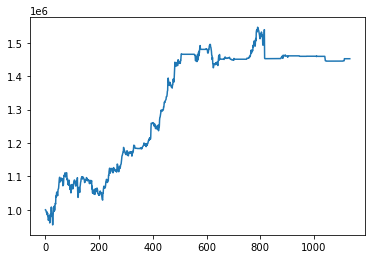

In [14]:
ensemble_account_value.account_value.plot()

In [15]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.0855641126146598


In [16]:
ensemble_account_value['Date'] = test_dji['Date']

In [17]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1000000.000000,20160104,NaN,2016-01-04
1,999511.257089,20160105,-0.000489,2016-01-05
2,997795.222924,20160106,-0.001717,2016-01-06
3,994114.017128,20160107,-0.003689,2016-01-07
4,991392.409974,20160108,-0.002738,2016-01-08


In [32]:
ensemble_account_value.tail()

,account_value,datadate,daily_return,Date
1129,1.452234e+06,20200629,0.0,2020-06-29
1130,1.452234e+06,20200630,0.0,2020-06-30
1131,1.452234e+06,20200701,0.0,NaN
1132,1.452234e+06,20200702,0.0,NaN
1133,1.452234e+06,20200706,0.0,NaN


In [33]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [ ]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,8.826%
Cumulative returns,44.514%
Annual volatility,8.067%
Sharpe ratio,1.09
Calmar ratio,1.20
Stability,0.79
Max drawdown,-7.381%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.38,2016-04-27,2016-11-04,2016-12-09,163
1,6.56,2019-02-25,2020-03-02,NaT,NaN
2,5.32,2016-02-04,2016-02-11,2016-02-22,13
3,4.68,2018-06-12,2018-06-27,2019-02-04,170
4,3.93,2016-01-04,2016-01-27,2016-02-04,24


C:\Users\Andy\PycharmProjects\finrlpaper1\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020\finrlpaperv4\Lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


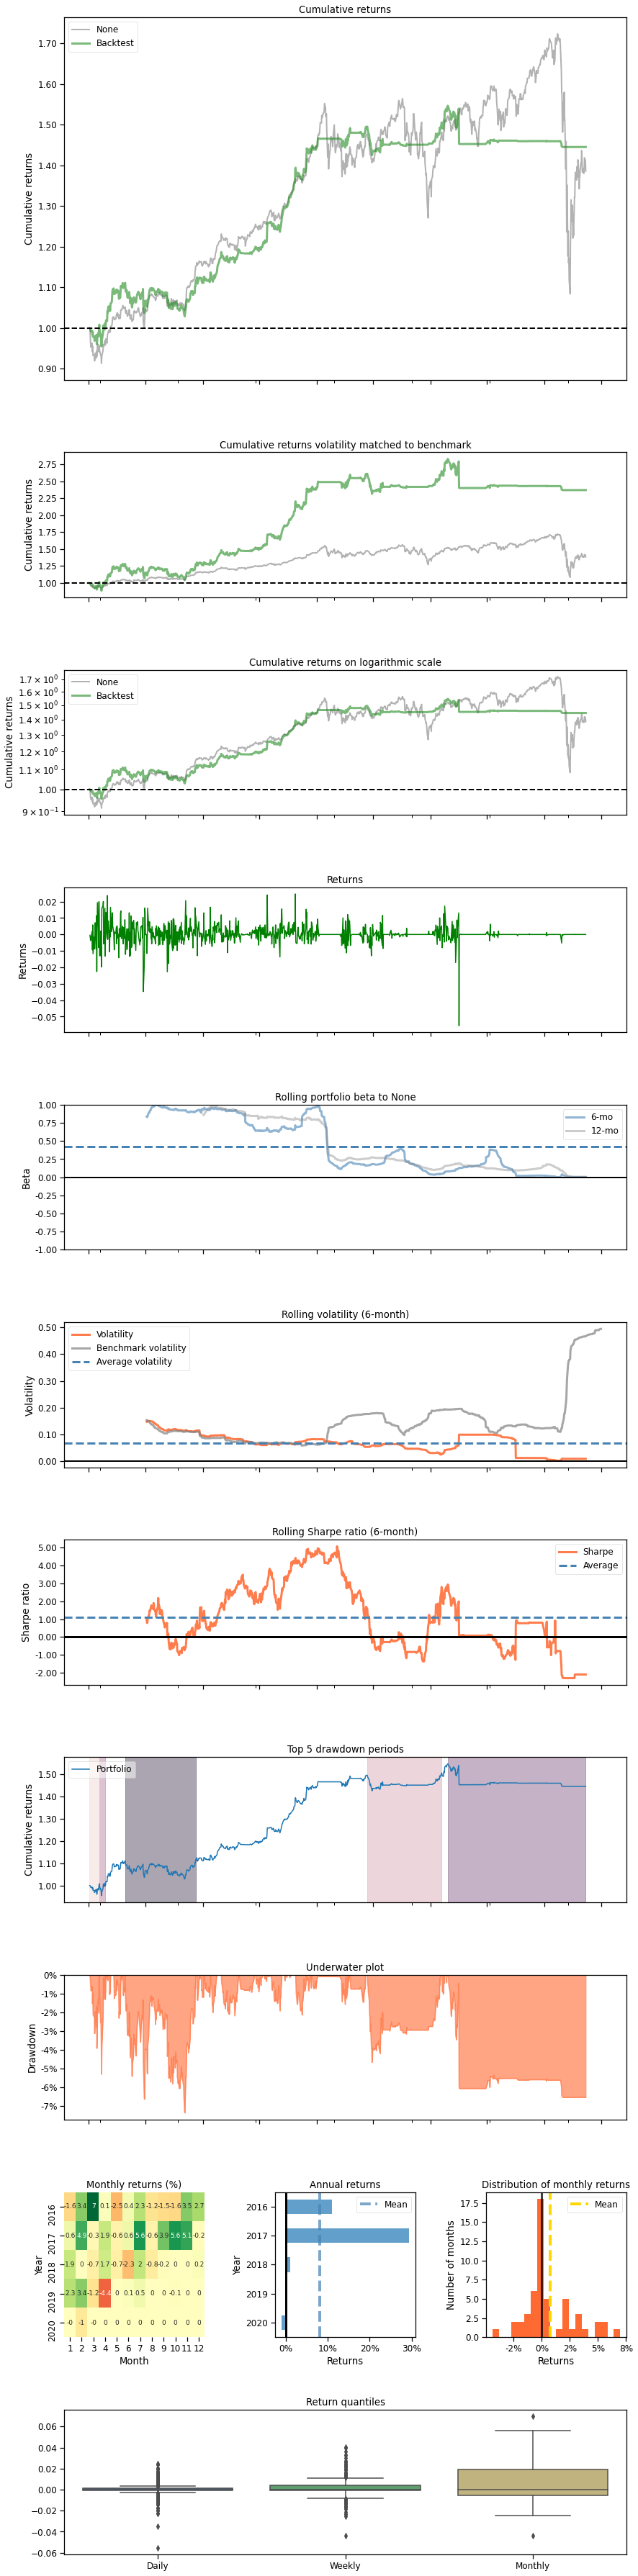

In [34]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)

#### BCAP : Discussion
so we see above that the plots are relatively weird.  
The volatility of the DRL strategy is lower than the benchmark. But could this not be because we cease trading in high turbulence periods? Need to figure out.  
  
  we also see that PPO underperforms the ensemble strategy; this makes sense by definition of the ensemble strategy, since we always pick the best-performing algorithm. If PPO was best-performing always, the ensemble would pick PPO always and we would end up at the PPO-Only strategy.  
  The only reason why the ensemble could underperform PPO-Only, would be if the performance of the agents in the 3 months validation period were not good forecasts for the future 3-month performance.
  
  This analysis needs following additions:  
  - make graphs better understandable (e.g. time stamps would be nice)
  - explain how this backtesting works exactly and what it does
  - what is "None"?
  - One plot for each agent separately what would be the performance if we would have traded on this agent only, then include in the plot the ensemble strategy (I think they have already plotted this somewhere but there is no code for this). Since the rollover is done by 3 months always (right?), would be good to indicate the 3-months ticks as well in the plot.
  - Get a metric for the following:
      - how often did the algo pick the correct agent for the subsequent trading period?
      - If an agent that has performed well in the past 3 months continues to perform well in the next 3 months, that could indicate that there is momentum in the market (?)
      - Test when the "pick" performs well and when not. Does momentum and reversal in the market have anything to do with it?
      
**ALSO**: I am not sure if they really do "backtesting" here. First, they use a period they are using for training anyway. Second, they don't use the trained model to run it again on a past timeline, but they pick the returns already calculated during the model run and basically use quantopian simply to plot against benchmark and get some metrix automatically.  
=> the fact that they don't rerun it on the backtesting period removes potential for different performance due to chance / probability, since there are randomness parts in the algorithm at multiple stages.
=> Should test on a real backtesting period, not within-training period.